# Machine Learning_CMSC643
## Project 1: Similar document searching via MinHash and Locality Sensitive Hashing

### In this first project we will implement the system described in the lecture notes for similar document searching. This project is inspired by http://mccormickml.com/2015/06/12/minhash-tutorial-with-python-code/.

### We will use documents from this repository http://www.inf.ed.ac.uk/teaching/courses/tts/assessed/assessment3.html. This is a dataset of documents for which we want to find possible plagiarism. It consists of 10,000 documents for which some pairs are tagged as instances of plagiarism. The goal of this exercise is to see how effectively and efficiently a minhash and LSH system can identify these instances.
### Note that smaller subsets of data suitable for testing are available here: https://github.com/chrisjmccormick/MinHash/tree/master/data

## Obtaining data
### We use the following python code to download data for the project.     
### Using the function fetch_data will download data to a subdirectory pointed to by the variable PLAGIARISM_PATH. We can assign the path we want to use for our data to that variable. The maxsize argument of the fetch_data function is used to limit the size of data downloaded. For testing and development we should use the 1000 document dataset. We can get that with function call fetch_data(maxsize=1000).

In [7]:
import os
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/chrisjmccormick/MinHash/master/data"
PLAGIARISM_PATH = "datasets/plagiarism"
DATA_SIZES = [100,1000,2500,10000]

def fetch_data(download_root=DOWNLOAD_ROOT, 
               plagiarism_path=PLAGIARISM_PATH, 
               data_sizes=DATA_SIZES,
               maxsize=1000):
  if not os.path.isdir(plagiarism_path):
      os.makedirs(plagiarism_path)
  for size in data_sizes:
      if size <= maxsize:
          train_file = "articles_" + str(size) + ".train" 
          train_path = plagiarism_path + '/' + train_file
          if not os.path.exists(train_path):
              train_url = download_root + '/' + train_file
              urllib.request.urlretrieve(train_url, train_path)
          
          truth_file = "articles_" + str(size) + ".truth"
          truth_path = plagiarism_path + '/' + truth_file
          if not os.path.exists(truth_path):
              truth_url = download_root + "/" + truth_file
              urllib.request.urlretrieve(truth_url, truth_path)
                
                
fetch_data (maxsize=10000)                

# Part I: Preliminaries

## Part IA: Dataset parsing
### Write a function parse_data that given the path to a filename, reads in the article data and returns an array of tuples. With One tuple per article (there is one article per line)
### For each article tuples will contain (id, string) where id is the article id and string is the article text as described.
### Then Process the article text to 
###     - remove all punctuation
###     - change all letters to lowercase
###     - remove all whitespace so that all words are concatenated

### The output return an array of tuples. Each one of the tuples show an article.
### At the end, I have parsed '/articles_100.train' to show how the code is working.

In [8]:
def parse_data(filename):
    import string

    array_of_doc_tuples=[]
    # read lines from filename
    #with open((filename)) as fp:
     #   for line in fp:
        
    f=open(filename,'r') 
    lines=f.readlines()
    
    for line in lines:
    # construct tuple of id and text
            id = line.split(' ')[0]
            text = str(line.split(' ')[1:])
            
    # process string as described above
            for ch in string.punctuation:                                                                                                     
                text=text.replace(ch, "")
                
            text=text.lower()
            
            text=text.replace(" ", "")
            
            tuples=(id,text)
            array_of_doc_tuples.append(tuples)
    # return tuple with id and processed string
            
        
    return array_of_doc_tuples




## Part IB: Document shingles
### Write a function shingle_document that given a processed article string and a parameter k shards the document as follows:
### each substring of length k in document is hashed to a 32-bit integer (see crc32 fucntion in https://docs.python.org/3/library/binascii.html)
### returns a list of the unique 32-bit integers obtained in previous step 


In [1]:
def shingle_document(string, k):
    import binascii
    # initialize set data structure
    set_data_structure=set()
    # for each position in string, extract substring of length k
    for i in range (len(string)-k+1):
        substring_length_k=string[i:i+k]
        
    # hash into 32-bit integer
        hash_substring=binascii.crc32( substring_length_k.encode())
    # insert into set
        set_data_structure.add(hash_substring)
    return (set_data_structure)     

## Part IC: Jaccard Similarity
### This jaccard function given two sharded documents, computes their Jaccard distance
### In this function we used nice property of sets. We can easily compute the union and intersection of two sets by following codes.

In [2]:
def jaccard(a, b):
  # compute union size
    union_size = len(set(a).union(set(b)))
  # compute intersection size
    intersection_size=len(set(a).intersection(set(b)))
  
  # return ratio of union and intersection
    return 1.0*intersection_size/union_size

## Part ID: Put all part I together
### Write a function that uses the above to do the following:
### Parse a file with data
### Return a list of tuples each tuple contains: (id1, id2, s), where id1 and id2 are document ids and s is the computed Jaccard similarity
### In the output I am printing the documents that show jaccard similarity more than 0.8.

In [3]:
def jaccard_of_documents(file_name, k):
    
    array_of_documents_tuples=parse_data (file_name)
    
    array_of_jaccard_tuples=[]
    
        
    for i in range(len(array_of_documents_tuples)):
        for j in range (i+1, len(array_of_documents_tuples)):
            a=shingle_document(array_of_documents_tuples[i][1], k)
            b=shingle_document(array_of_documents_tuples[j][1], k)
            jaccard_similarity = jaccard(a,b)
            jaccard_tuples = (array_of_documents_tuples[i][0],array_of_documents_tuples[j][0],jaccard_similarity)
            if jaccard_similarity>=0.8:
                print (jaccard_tuples)
            array_of_jaccard_tuples+=[jaccard_tuples]
            
    return array_of_jaccard_tuples

# Here in the output I am showing the documents that have more than 0.8 jaccard similarity at first and the the jaccard similarity for all others. The data input is /articles_100.train and k=10.
## The results match with truth file.

In [69]:
array_of_jaccard_tuples=jaccard_of_documents("datasets/plagiarism/articles_100.train",10)


('t980', 't2023', 0.9855595667870036)
('t1088', 't5015', 0.9900826446280991)
('t1297', 't4638', 0.9867439933719967)
('t1768', 't5248', 0.9900744416873449)
('t1952', 't3495', 0.9837983798379838)


# Here in the output I am showing the documents that have more than 0.8 jaccard similarity for /articles_1000.train input and shingle length(k)=10. 
## The results match with truth file.

In [8]:
array_of_jaccard_tuples=jaccard_of_documents("datasets/plagiarism/articles_1000.train",10)


('t980', 't2023', 0.9855595667870036)
('t1088', 't5015', 0.9900826446280991)
('t1297', 't4638', 0.9867439933719967)
('t1768', 't5248', 0.9900744416873449)
('t1952', 't3495', 0.9837983798379838)
('t2535', 't8642', 0.9897233201581027)
('t2839', 't9303', 0.990606936416185)
('t2957', 't7111', 0.9906904577191621)
('t3268', 't7998', 0.9824236817761333)
('t3466', 't7563', 0.9868131868131869)


## Part IE: Experiment 0
### In this part we want to do an experiment to see what the effect of sharding length k is on the Jaccard similarity of plagiarism instances versus instances that are not plagiarized. We use the 1000 document dataset for this experiment. 
### The inputs are the train data set and truth data set.
### The outputs are set of plagiarized and non-plagiarized instances.
### First we read the truth file to see what documents are plagiarized. Also to generate a set of non plagiarized documents, we look at the truth data set and we choose all of them one by one. Then randomly pick another document and check that this document shouldn't be part of the truth file. If it is we continue to pick another one until we find one that is not part of the truth file. So this way we generate a set of non_plagiarized documents and they are twice as many as plagiarized documents. 

In [4]:
import random
import numpy as np

def plagiarized_non_plagiarized_instances(file_name1,file_name2):
    import random
    f=open(file_name2,'r') 
    plagiarized_instances=[]
    non_plagiarized_instances=[]
    lines=f.readlines()
    
    for line in lines:
        # construct tuple of id and text
        first_doc = line.split(' ')[0]
        second_doc = line.split(' ')[1].strip()
        truth_tuples=(first_doc,second_doc)    
            
        plagiarized_instances.append(truth_tuples)
        
    array_of_documents_tuples=parse_data (file_name1)
    num_doc=len(array_of_documents_tuples)

    list_truth=[]
    for i,j in plagiarized_instances:
        list_truth.append(i)
        list_truth.append(j)   
        
    for i in list_truth:
    
        j=array_of_documents_tuples[random.randint(0,num_doc)][0] 
    
        while j in list_truth:
            j=array_of_documents_tuples[random.randint(0,num_doc)][0]
        instance=(i,j)  
        non_plagiarized_instances.append(instance)
        
        
        
    return plagiarized_instances, non_plagiarized_instances

## Part IE: Experiment 0_Continue
### Here we calculate the jaccard similarity between the plagiarized and non-plagiarized documents. 
### The inputs are the train data set and truth data set and length of shingle.
### The output is average jaccard similarity for plagiarized sets and non-plagiarized sets.

In [5]:
def jaccard_similarity_plagiarized_non_plagiarized(file_name1,file_name2,k):
    
    array_of_documents_tuples=parse_data (file_name1)
    docids=[]
    for i in range(len(array_of_documents_tuples)):
        docids.append(array_of_documents_tuples[i][0])
    plagiarized_instances,non_plagiarized_instances=plagiarized_non_plagiarized_instances(file_name1,file_name2)
    
    similarity_plagiarized=[]
    for i,j in plagiarized_instances:
        index_id1=docids.index(i)
        index_id2=docids.index(j)
        a=shingle_document(array_of_documents_tuples[index_id1][1], k)
        b=shingle_document(array_of_documents_tuples[index_id2][1], k)
        similarity_plagiarized.append(jaccard(a,b))
       
    ave_similarity_plagiarized=np.average(similarity_plagiarized)
    
    similarity_non_plagiarized=[]
    for i,j in non_plagiarized_instances:
        index_id1=docids.index(i)
        index_id2=docids.index(j)
        a=shingle_document(array_of_documents_tuples[index_id1][1], k)
        b=shingle_document(array_of_documents_tuples[index_id2][1], k)
        similarity_non_plagiarized.append(jaccard(a,b))
       
    ave_similarity_non_plagiarized=np.average(similarity_non_plagiarized)
    
    return ave_similarity_plagiarized, ave_similarity_non_plagiarized    
    
    

## Part IE: Experiment 0_Continue
### Here we plot the average jaccard similarity for plagiarized sets and non-plagiarized sets for different k.  k varies between 1 and 101 by step 4. 
### From the graph we can see if we use k=10 false positives will be very low and after that it somehow stays the same. If we choose threshold at 0.9 or even 0.8 then we will have very little chance of false negative. So I will use k=10 in the remaining parts.

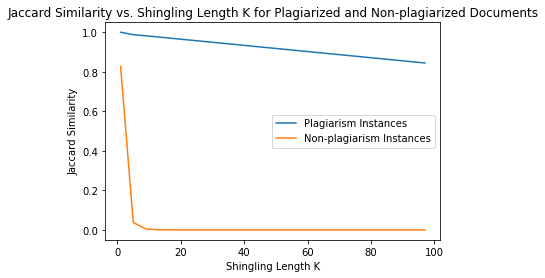

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
file_name1="datasets/plagiarism/articles_1000.train"
file_name2="datasets/plagiarism/articles_1000.truth"
set_ave_similarity_plagiarized=[]
set_ave_similarity_non_plagiarized=[]
set_k=[]
for k in range (1, 101,4):

    ave_similarity_plagiarized, ave_similarity_non_plagiarized=jaccard_similarity_plagiarized_non_plagiarized(file_name1,file_name2,k)
    set_ave_similarity_plagiarized.append(ave_similarity_plagiarized)
    set_ave_similarity_non_plagiarized.append(ave_similarity_non_plagiarized)
    set_k.append(k)
    
plt.plot(set_k,set_ave_similarity_plagiarized)    
plt.plot(set_k,set_ave_similarity_non_plagiarized)  
plt.legend(['Plagiarism Instances', 'Non-plagiarism Instances'],loc=5)
plt.xlabel('Shingling Length K')
plt.ylabel('Jaccard Similarity')
plt.title('Jaccard Similarity vs. Shingling Length K for Plagiarized and Non-plagiarized Documents')
                                                                                                 


# Part II: MinHash
## In this section we will implement the MinHash algorithm and perform an experiment to see how well it estimates Jaccard similarity.
## Part IIA: Prepare shingles for processing
### Implement a function that takes the shingled documents and returns a list of item-document pairs sorted by items that we’ll use to compute the minhash signature of each document. Remember that because of the shingling logic we used above, we represent items as 32-bit integers. The function specs are as follows:
### Input is a list of tuples of form (docid, [items]), so far we don't have this kind of input. I will generate it in the following section.
### Output will be a tuple with two elements:
###      - a list of tuples of form (item, docid). It will contain one entry for each item appearing in each document.
###      - a list of document ids found in the dataset
### Output should be sorted by item

In [10]:
def invert_shingles(shingled_documents):
  # initialize list for tuples
    list_of_tuples = []
  # initialize list for document ids
    list_of_documentid = []
  # for each document in input
    for shingled_document in shingled_documents:
    # append document id to list
        list_of_documentid.append(shingled_document[0])
    # for each item in document
        for item in shingled_document[1]:
      # append (item, docid) tuple
            list_of_tuples.append((item,shingled_document[0]))
  
  # sort tuple list
    list_of_tuples.sort()
  # return sorted tuple list, and document list
    return list_of_tuples, list_of_documentid

### Here I am preparing the shingled_documents input for the above function. This function get the file name and shingle length as input and will put all the shingled documents together. The output of this function will make the input for above function.

In [21]:
def shingles_of_documents (file_name,k):
    array_of_documents_tuples= parse_data(file_name)
    
    tuple_shingled_documents=[]
    for i in range(len(array_of_documents_tuples)):
        a=shingle_document(array_of_documents_tuples[i][1], k)
        shingled_documents=(array_of_documents_tuples[i][0],a)    
        
        tuple_shingled_documents+=[shingled_documents]   
    
    return tuple_shingled_documents

## Part IIB: Generate hash functions


### Generating random hash functions
### This function generates a random hash function suitable to mimic permutations over 32-bit integers. Recall since we are using crc32 to represent items we need random hash functions that generate 32-bit numbers.
### Some notes: this implements a universal hash function for 32-bit integers, which will ensure the result corresponds to a permutation of rows of the characteristic matrix as required by Minhash (see https://en.wikipedia.org/wiki/Universal_hashing). Here m is the largest number returned by crc32, and p is a prime number larger than m.

In [12]:
import random

def make_random_hash_fn(p=2**33-355, m=4294967295):
    a = random.randint(1,p-1)
    b = random.randint(0, p-1)
    return lambda x: ((a * x + b) % p) % m

### This is an example of how to use this function:

In [13]:
hash_fn = make_random_hash_fn()
print(hash_fn(8))

2094387795


### Here we use the make_random_hash_fn function to create function make_hashes. Given input num_hashes this function will return a list of hash functions that mimic the random permutation approach used in Minhash calculation. The function specs are:
### Input is an integer num_hash
### Output is a list of hash functions created by function make_random_hash_fn

In [14]:
def make_hashes(num_hashes):
    list_of_hash_fn=[]
    for i in range(num_hashes):
        list_of_hash_fn.append(make_random_hash_fn())
        
    return list_of_hash_fn   

        


## Part IIC: Construct the Minhash Signature Matrix
### Here in this part we write make_minhash_signature function which build the Minhash signature matrix. The inputs are shingled data and number of hashes. For the output we get the minhash signature and also the documents id's.
### In this function first we set all the numbers in minhash signature matrix to infinity and we update the matrix as explained in our text book.

In [15]:
import numpy as np

def make_minhash_signature(shingled_data, num_hash):
    inv_index, docids = invert_shingles(shingled_data)
    num_docs = len(docids)
  
  # initialize the signature matrix with infinity in every entry
    sigmatrix = np.full([num_hash, num_docs], np.inf)
    
  # generate hash functions
    hash_funcs = make_hashes(num_hash)
  
  # iterate over each non-zero entry of the characteristic matrix
    
    for row, docid in inv_index:
    # update signature matrix if needed 
    # THIS IS WHAT YOU NEED TO IMPLEMENT
        
    
        for row1 in range(num_hash):
            sigmatrix[row1,docids.index(docid)]=min(sigmatrix[row1,docids.index(docid)],hash_funcs[row1](row))
      
            
        
        
    return sigmatrix, docids


## Part IID: MinHash similarity estimate
### This function computes the similarity of two documents using the minhash matrix computed above. The function specs are:
### Inputs:
###    - id1, id2: document ids
###    - minhash_sigmat: minhash signature matrix
###    -docids: list of document ids, used to index the columns of the minhash signature matrix
### Output: Jaccard similarity estimated using minhash

In [16]:
def minhash_similarity(id1, id2, minhash_sigmat, docids):
  # get column of the similarity matrix for the two documents
    index_id1=docids.index(id1)
    index_id2=docids.index(id2)
    
  # calculate the fraction of rows where two columns match
    minhash_similarity_estimate= np.mean(minhash_sigmat[:, index_id1]==minhash_sigmat[:, index_id2])
    
  # return this fraction as the minhash similarity estimate
    return minhash_similarity_estimate 
    

## Part IIE: Put these together
### This function computes the Minhash estimated similarities between each pair of documents. The inputs are  shingled documents and number of hashes. The output is list of similar documents. The threshhold I used here is 0.8.

In [17]:
def minhash_similar_of_documents(shingles,num_hash):
    
    
    
    array_of_minhash_similar_tuples=[]
    
    list_of_tuples, list_of_documentid=invert_shingles(shingles)    
    minhash_sigmat,list_of_documentid=make_minhash_signature(shingles, num_hash)
    
    for i in range(len(shingles)):
        for j in range (i+1, len(shingles)):
                        
            minhash_similar=minhash_similarity(shingles[i][0], shingles[j][0], minhash_sigmat, list_of_documentid)
            
            
            
            minhash_tuples = (shingles[i][0], shingles[j][0],minhash_similar)
            
            if minhash_similar>=0.8:
                
                array_of_minhash_similar_tuples+=[minhash_tuples]
                
            
    return array_of_minhash_similar_tuples

## Part IIF: Experiment 1
### In this experiment we want to see what  the effect of the number of hash functions used to compute the Minhash signature is on the accuracy of the Minhash estimate of Jaccard similarity. 
### In this function accuracy is defined as the square of the difference between minhash_similarity and jaccard similarity. The output is an array of this defined accuracy. The array is better than a single number like an average because we can estimate several statistics like average, interquartiles and etc of the array of accuracy.

In [18]:
def accuracy_of_minhashsig_to_jaccard (file_name1,num_hash,k):
    
    array_of_documents_tuples=parse_data (file_name1)
    docids=[]
    for i in range(len(array_of_documents_tuples)):
        docids.append(array_of_documents_tuples[i][0])
        
    shingles= shingles_of_documents(file_name1,k)
    array_of_minhash_jaccard_accuracy=[]
    
    list_of_tuples, list_of_documentid=invert_shingles(shingles)    
    minhash_sigmat,list_of_documentid=make_minhash_signature(shingles, num_hash)
    
    for i in range(len(shingles)):
        for j in range (i+1, len(shingles)):
                        
            minhash_similar=minhash_similarity(shingles[i][0], shingles[j][0], minhash_sigmat, list_of_documentid)
            
            
            index_id1=docids.index(shingles[i][0])
            index_id2=docids.index(shingles[j][0])
            a=shingle_document(array_of_documents_tuples[index_id1][1], k)
            b=shingle_document(array_of_documents_tuples[index_id2][1], k)
            jaccard_similar = jaccard(a,b)
            
            minhash_jaccard_accuracy = (minhash_similar - jaccard_similar)**2
            
                
            array_of_minhash_jaccard_accuracy.append(minhash_jaccard_accuracy)
                
            
    return array_of_minhash_jaccard_accuracy

## Part IIF: Experiment 1 Continue
### Here we want to see when the number of hashes grows how the accuracy grows. So I am calculating the accuracy array for 10, 100 and 1000 number of hashes and then I am ploting these three data sets to compare and see how the accuracy changes by increasing the number of hashes. At the plot we can see that when the number of hashes grows the accuracy improves. For 10 hashes the difference can be as high as 0.25 and 0.1 but the data gets more accurate when the number of hashes increases.

In [22]:
file_name1="datasets/plagiarism/articles_1000.train"
k=10
num_hash=10 
X_10 = accuracy_of_minhashsig_to_jaccard (file_name1,num_hash,k)
num_hash=100
X_100 = accuracy_of_minhashsig_to_jaccard (file_name1,num_hash,k)
num_hash=1000
X_1000 = accuracy_of_minhashsig_to_jaccard (file_name1,num_hash,k)


([<matplotlib.axis.XTick at 0x24fbb0d0f60>,
 <a list of 3 Text xticklabel objects>)

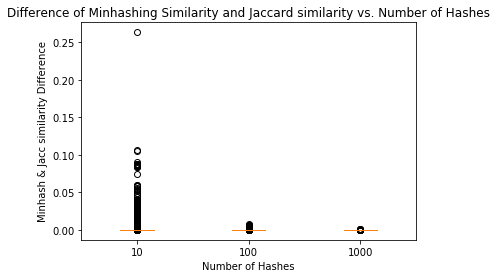

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([X_10,X_100,X_1000]) 
plt.xlabel('Number of Hashes')
plt.ylabel('Minhash & Jacc similarity Difference')
plt.title('Difference of Minhashing Similarity and Jaccard similarity vs. Number of Hashes')
plt.xticks([1,2,3], ['10','100','1000'])

# Part III: Locality-Sensitive Hashing
### This function chooses the number of bands for LSH based on given a similarity threshold.

In [37]:
import scipy.optimize as opt
import math

def _choose_nbands(threshold, nhashes):
    error_fun = lambda x: (threshold-((1/x[0])**(x[0]/nhashes)))**2
    res = opt.minimize(error_fun, x0=(10), method='Nelder-Mead')
    b = int(math.ceil(res['x'][0]))
    r = int(nhashes / b)
    final_t = (1/b)**(1/r)
    return b, final_t

## Hashing a vector
### In LSH for each band we hash the r hash values for each document. We can use this function to generate a hash function for vectors.

In [38]:
def _make_vector_hash(num_hashes, m=4294967295):
    hash_fns = make_hashes(num_hashes)
    def _f(vec):
      acc = 0
      for i in range(len(vec)):
        h = hash_fns[i]
        acc += h(vec[i])
        return acc % m
    return _f

## Implement LSH
### This function implements locality sensitive hashing. Inputs: a minhash signature matrix, number of hash functions used to construct minhash signature matrix, list of document ids and a minimum Jaccard similarity threshold. Output: a list of hash tables. The hash function of the r rows for each document make a key in the dictionary. If the other documents in that band make the same hash function so that document also belong to that key and then the two documents are put in the same bucket.

In [39]:
from collections import defaultdict

def do_lsh(minhash_sigmatrix, numhashes, docids, threshold):
  b, _ = _choose_nbands(threshold, numhashes)
  r = int(numhashes / b)
  narticles = len(docids)
  hash_func = _make_vector_hash(r)
  
  buckets = []
  for band in range(b):
    start_index = int(band * r)
    end_index = min(start_index + r, numhashes)
    
    cur_buckets = defaultdict(list)
    
    for j in range(narticles):
      # THIS IS WHAT YOU NEED TO IMPLEMENT
        
        key_val=hash_func(minhash_sigmatrix[start_index:end_index,j])
        single_bucket_dict={key_val:(docids[j],)}
        for key in single_bucket_dict:
            if key in cur_buckets:
                cur_buckets[key]+=(single_bucket_dict[key])
            else:
                cur_buckets[key]=single_bucket_dict[key]
        
        
        
        
    buckets.append(cur_buckets)
  
  return buckets

## Find candidate similar article pairs
### This function uses the result of our LSH function and returns list of candidate article pairs. It looks at the buckets we generated with do_lsh function and if there is more than one document in each bucket it makes a combination of those documents as similar documents.
### Input: the result of do_lsh and Output: list of tuples (docid1, docid2) each a candidate similar article pair according to LSH.

In [40]:
def find_candidate_silimar_documents(buckets):
    candidate_pairs=[]
    for val in range(len(buckets)):
        for key in buckets[val]:
            if len(buckets[val][key])>1:
                for i in range(len(buckets[val][key])-1):
                    candidate=(buckets[val][key][i],buckets[val][key][i+1])
                    candidate_pairs.append(candidate)
        
    return candidate_pairs    
        

### This function finds the plagiarized articles. It uses the candidate lists and look at the minhash_similarity of the candidates in the minhash signature matrix and if it's higher than the threshhold it will choose as plagiarized articles. I checked it on 100 size documents and the plagiarized articles are the same as the truth file.
### Inputs: file_name, shingle length(k), number of hashes and threshold
### Output: similar documents

In [41]:
def find_silimar_documents(file_name,k,num_hashes,threshold):
    shingles= shingles_of_documents(file_name,k)
    minhash_sigmat,list_of_documentid=make_minhash_signature(shingles, num_hashes)
    buckets= do_lsh(minhash_sigmat, num_hashes, list_of_documentid, threshold)
    candidate_list=find_candidate_silimar_documents(buckets)
    similar_docs=[]
    for i,j in candidate_list:
        if (i,j) not in similar_docs:
            if minhash_similarity(i, j, minhash_sigmat, list_of_documentid)>0.8:
                similar=(i,j)
                similar_docs.append(similar)
    return similar_docs      

In [43]:
file_name="datasets/plagiarism/articles_100.train"
k=10
num_hashes=30
threshold=0.8
similar_docs= find_silimar_documents(file_name,k,num_hashes,threshold)
similar_docs

[('t980', 't2023'),
 ('t1088', 't5015'),
 ('t1297', 't4638'),
 ('t1768', 't5248'),
 ('t1952', 't3495')]

## Experiment 2: LSH sensitivity
### This function computes the sensitivity and specificity of LSH as a function of the threshold. We use the candidate pairs and plagiarized set from the truth file and calculate the false positive, false negative, true positive. Sensitivity is ratio of true positive to the whole positive and specificity is the ratio of false positive to the whole negative. The threshold is ranging from 0.2 to 1 in 0.2 steps. 
### Inputs: Train set file_name, truth set file_name, shingle length(k), and number of hashes.
### Outputs: sensitivity and specificity of the LSH

In [54]:
def LSH_specificity_sensitivity(file_name1,file_name2,k,num_hashes):

    plagiarized_instances,_=plagiarized_non_plagiarized_instances(file_name1,file_name2)

    shingles= shingles_of_documents(file_name1,k)
    minhash_sigmat,list_of_documentid=make_minhash_signature(shingles, num_hashes)
    sensitivity=[]
    specificity=[]
    false_positive1=[]

    for threshold in np.arange(0.2,1,0.2):
        buckets= do_lsh(minhash_sigmat, num_hashes, list_of_documentid, threshold)
        candidate_list=find_candidate_silimar_documents(buckets)
        cur_true_positive=len(set(candidate_list).intersection(set(plagiarized_instances)))
        cur_false_positive=len(candidate_list) - cur_true_positive
        cur_false_negative=len(plagiarized_instances)-cur_true_positive
        whole_negative = (len(list_of_documentid))**2 - len(candidate_list)
        whole_positive=len(candidate_list)
        cur_sensitivity= (1.0*cur_true_positive)/whole_positive
        cur_specificity=(1.0*cur_false_positive)/whole_negative
        sensitivity.append(cur_sensitivity)
        specificity.append(cur_specificity)
                                
    return sensitivity, specificity

In [55]:
file_name1="datasets/plagiarism/articles_1000.train"
file_name2="datasets/plagiarism/articles_1000.truth"
k=10
num_hashes=100
sensitivity, specificity= LSH_specificity_sensitivity(file_name1,file_name2,k,num_hashes)

### Here I plot the sensitivity and specificity of LSH as a function of threshhold. We can see that by increasing the threshold the sensitivity is increasing and specificity is decreasing. It does make sense because when threshold increases we are goig to have fewer candidates and so the ration of true positive to whole positives increases. 

(0, 1)

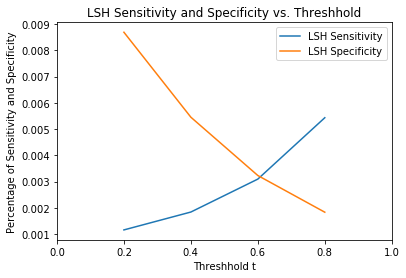

In [67]:
plt.plot(np.arange(0.2,1,0.2),sensitivity)    
plt.plot(np.arange(0.2,1,0.2),specificity)  
plt.legend(['LSH Sensitivity', 'LSH Specificity'],loc=1)
plt.xlabel('Threshhold t')
plt.ylabel('Percentage of Sensitivity and Specificity')
plt.title('LSH Sensitivity and Specificity vs. Threshhold')
plt.xlim(0,1)